In [31]:
%matplotlib inline

# Introduction

In this notebook, we aim to verify the derived correlation between flux and internal luminosity at 70 microns, first presented in section 3.2 of [Dunham _et. al._ (2008)](https://ui.adsabs.harvard.edu/abs/2008ApJS..179..249D/abstract). The motivation behind this work stems from the observation that the correlation was only derived for protostars whose envelopes' variable masses were between 1-10 solar masses, $$\begin{align*}1~\text{M}_\odot\leq M_\text{env}\leq10~\text{M}_\odot\end{align*}$$ implying that the study failed to consider protostars whose cores contained less than 1 solar mass. In other words, it was only tested for younger protostars whose mass distributions were still heavily centered around their surrounding envelopes. Hence, we propose to repeat the derivation while extending our considerations accordingly, to determine if the correlation still holds.

# Import Dependencies

In [32]:
# System & OS
import warnings
warnings.filterwarnings('ignore')

# Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()
sns.set_style('darkgrid')

# Mount Storage

`cd` to the `data/` directory.

In [33]:
%cd '../data/'

/Users/zach/Documents/Python/Protostellar-Luminosity/data


# Data Analysis

Read in our results from `2_linear_regression.ipynb`.

In [58]:
# Read in linear coefficients
coef = pd.read_csv('lin_coef.csv', skiprows=1, names=['Class', 
                                                      'Wavelength (microns)', 
                                                      'Slope', 
                                                      'Unc_slope', 
                                                      'Intercept', 
                                                      'Unc_intercept'])
# Read in correlation metrics
corr = pd.read_csv('corr_coef.csv', skiprows=1, names=['Class', 
                                                       'Wavelength (microns)', 
                                                       'Reduced chi-squared (linear space)', 
                                                       'Reduced chi-squared (log10 space)', 
                                                       'Correlation coefficient (linear space)', 
                                                       'Correlation coefficient (log10 space)'])

# Merge the two dataframes along the class and wavelength columns
df = pd.merge(coef, corr, on=['Class', 'Wavelength (microns)'])
df

,Class,Wavelength (microns),Slope,Unc_slope,Intercept,Unc_intercept,Reduced chi-squared (linear space),Reduced chi-squared (log10 space),Correlation coefficient (linear space),Correlation coefficient (log10 space)
0,0,36000.29516661664,0.205222,0.001546,-18.520233,0.002017,nan,-1.193127e+01,0.477976,0.748775
1,1a,36000.29516661664,0.344443,0.000991,-18.817223,0.001138,nan,-1.848508e+01,0.343043,0.887259
2,1b,36000.29516661664,0.594088,0.001722,-19.119119,0.001299,nan,-4.768334e+01,0.434630,0.886253
3,All,36000.29516661664,0.457110,0.001066,-18.954541,0.001106,nan,-1.500133e+02,0.222630,0.836356
4,0,24000.196777744422,0.218374,0.001342,-17.695543,0.001752,nan,-9.434475e+00,0.576396,0.810642
...,...,...,...,...,...,...,...,...,...,...
399,All,0.050000409953634216,8.579801,0.078281,-47.486629,0.083609,nan,-1.986639e+05,0.068419,0.418470
400,0,All,0.931400,0.005067,-11.827745,0.006656,nan,-1.984456e+06,0.504110,0.157855
401,1a,All,0.982002,0.003401,-11.474304,0.003913,nan,-3.705078e+06,0.571380,0.158788
402,1b,All,1.012902,0.003656,-11.380369,0.002766,nan,-3.584868e+06,0.669250,0.152804


### All wavelengths

First, check the data at all wavelengths.

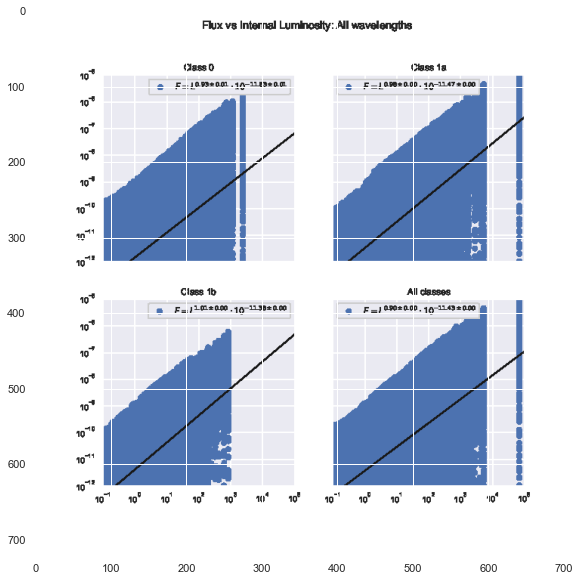

In [39]:
img = mpimg.imread('Figures/flux_vs_lint_master.eps')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

In [51]:
df.iloc[-4:, :]

,Class,Wavelength (microns),Slope,Unc_slope,Intercept,Unc_intercept,Reduced chi-squared (linear space),Reduced chi-squared (log10 space),Correlation coefficient (linear space),Correlation coefficient (log10 space)
400,0,All,0.931400,0.005067,-11.827745,0.006656,nan,-1.984456e+06,0.504110,0.157855
401,1a,All,0.982002,0.003401,-11.474304,0.003913,nan,-3.705078e+06,0.571380,0.158788
402,1b,All,1.012902,0.003656,-11.380369,0.002766,nan,-3.584868e+06,0.669250,0.152804
403,All,All,0.895578,0.002048,-11.426903,0.002129,nan,-9.319788e+06,0.571042,0.155152


Notice from the correlation coefficients in `log10` space, as well as via visual inspection, that there is no correlation amongst the data at all wavelengths. This is to be expected, as there would be no need to derive a wavelength-specific correlation otherwise.

### 70 microns

Next, we inspect the data closest to 70 microns (where the previously derived correlation was found).

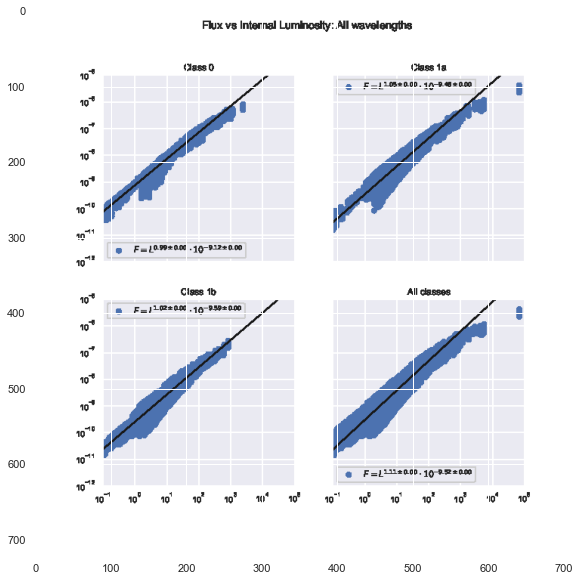

In [41]:
img = mpimg.imread('Figures/flux_vs_lint_7.36e+1.eps')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.show()

In [59]:
# Drop the rows with all wavelengths
df.drop(index=[400, 401, 402, 403], inplace=True)
# Typecast wavelength column to float
df['Wavelength (microns)'] = df['Wavelength (microns)'].apply(lambda x: float(x))
# Retrive rows with wavelength closest to 70 microns
df[np.isclose(df['Wavelength (microns)'], 7.35706025e+01)]

,Class,Wavelength (microns),Slope,Unc_slope,Intercept,Unc_intercept,Reduced chi-squared (linear space),Reduced chi-squared (log10 space),Correlation coefficient (linear space),Correlation coefficient (log10 space)
104,0,73.570602,0.991177,0.001600,-9.123577,0.002088,nan,-28.963521,0.919712,0.982471
105,1a,73.570602,1.051372,0.002000,-9.460327,0.002296,nan,-165.302103,0.856317,0.945712
106,1b,73.570602,1.022947,0.001951,-9.593142,0.001472,nan,-127.579043,0.965017,0.945657
107,All,73.570602,1.107987,0.001333,-9.520574,0.001383,nan,-514.076791,0.797523,0.947305


Notice again from the correlation coefficients in `log10` space, as well as via visual inspection, that there is a strong positive correlation between flux and internal luminosity at 70 microns, which is consistent with Dunham's previous work. Intriguingly, this correlation appears to hold across classes.